In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn.datasets as data

# # Creating Dataset

In [2]:
data_set, labels = data.make_blobs(n_samples=  50, n_features = 2,centers = 2)
labels[labels == 0] = -1

In [3]:
def random_ini():
    w1 = np.random.randn()
    w2 = np.random.randn()
    w0 = np.random.randn()
    return w1,w2,w0

In [4]:
def make_show(data_set,labels,w1,w2,w0):
    plt.figure(figsize = (10,6))
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    sbn.scatterplot(x = data_set[:,0], y = data_set[:,1], hue = labels, palette = 'flare')
    p = np.arange(-10,10)
    q = (-w1/w2)*p - (w0/w2)
    sbn.lineplot(x = p,y= q)

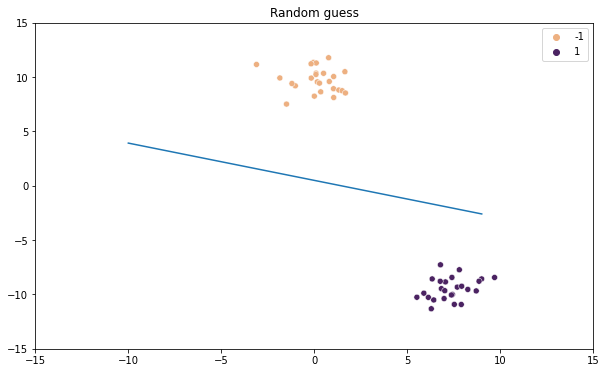

In [5]:
w1,w2,w0 = random_ini()
make_show(data_set,labels,w1,w2,w0)
plt.title('Random guess')
plt.show()

# Finding Good Line

In [7]:
def my_algo(data_points,labels,w,c):
    w = w
    c = c

    for iteration in range(1000): 
        # Number of times we repeat the experiment
        
        misclassified_points = 0    # Number of Misclassified_points 
        
        point_index = []
        
        for n in range(len(data_points)):
            
            if np.sign(np.dot(w,data_points[n]) + c) != labels[n]:
                misclassified_points += 1
                point_index.append(n)
        accuracy = (len(data_points) - misclassified_points)/len(data_points)
        
        if accuracy > 0.96:
            return w,c
        
#         Now let's update the weights:
        
        if iteration == 999:
            return w,c
            
        positive = 0
        pos = np.array([0,0],dtype='float')

        negative = 0
        neg = np.array([0,0],dtype='float')
    
        for index in point_index:
            if labels[index] == 1:
                positive += 1
                pos += data_points[index]
            else:
                negative += 1
                neg += data_points[index]
        if positive != 0:
            pos = pos/positive
            w = w + pos
            c = c + 1
        else:
            neg = neg/negative
            w = w - neg
            c = c - 1

In [9]:
w = [w1,w2]

In [11]:
w,w0 = my_algo(data_set,labels,w,w0)
w1 = w[0]
w2 = w[1]

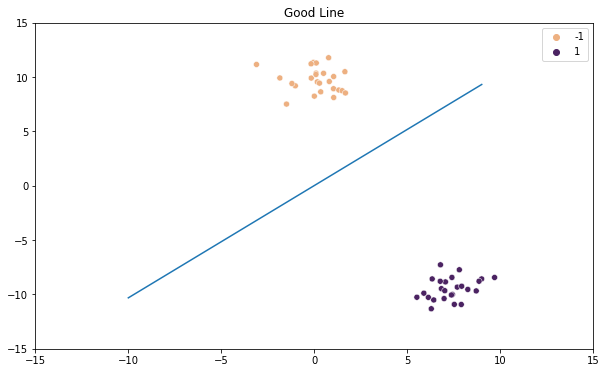

In [12]:
make_show(data_set, labels, w1, w2, w0)
plt.title('Good Line')
plt.show()

# Optimization to Get Best line

In [13]:
def loss(w1,w2,w0,data_set,labels):
    n = len(data_set)
    loss = 0
    
    norm = np.sqrt(w1*w1 + w2*w2)
    
    for i in range(n):
        loss += (labels[i] * (w1*data_set[i][0] + w2*data_set[i][1] + w0))
    return -loss/norm

In [14]:
def derivative(w1,w2,w0,data_set,labels,delta = 0.00001):
    vector = []
    listy = [0,0,0]
    for i in range(3):
        listy[i] = delta
        ans = (loss(w1+listy[0],w2+listy[1],w0+listy[2],data_set,labels) - loss(w1,w2,w0,data_set,labels))/delta 
        vector.append(ans)
        listy[i] = 0
    return vector

In [15]:
def update(w1,w2,w0,vector, n):
    new1 = w1 - (n*vector[0])
    new2 = w2 - (n*vector[1])
    new0 = w0 - (n*vector[2])
    return new1,new2,new0

In [16]:
def grad_desc(w1,w2,w0, data_set,labels):
    losses = []
    old1 = w1
    old2 = w2
    old0 = w0
    
    for iteration in range(1000):
        losses.append(loss(old1,old2,old0,data_set,labels))
        
        grad_vector = derivative(old1,old2,old0,data_set,labels,delta = 0.00001) 
        
        new1,new2,new0 = update(old1,old2,old0,grad_vector,n=0.01)
        
        new = np.array([new1,new2,new0])
        old = np.array([old1,old2,old0])
        
        
        if np.all(abs(new - old) < 10**-4):
            print('Converged iteration:',iteration)
            make_show(data_set,labels,new1,new2,new0)
            return new1,new2,new0,losses,iteration
        
        if iteration % 50 == 0:
            plt.figure()
            make_show(data_set,labels,new1,new2,new0)
            plt.title(f'Iteration {iteration}')
            plt.show()
            
        if iteration == 999:
            print('Forced stop')
            make_show(data_set,labels,new1,new2,new0)
            return new1,new2,new0,losses,iteration
        old1 = new1
        old2 = new2
        old0 = new0
        

#### Before

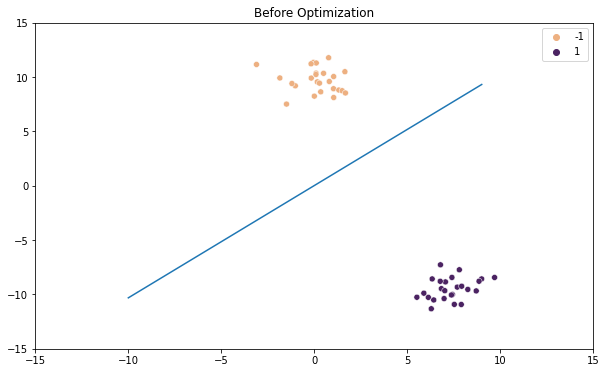

In [17]:
make_show(data_set, labels, w1, w2, w0)
plt.title('Before Optimization')
plt.show()
print()

#### After

<Figure size 432x288 with 0 Axes>

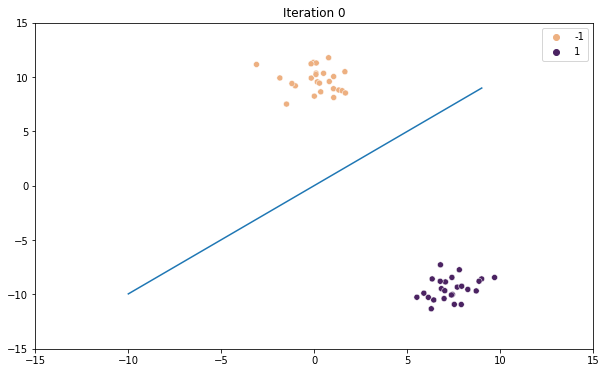

<Figure size 432x288 with 0 Axes>

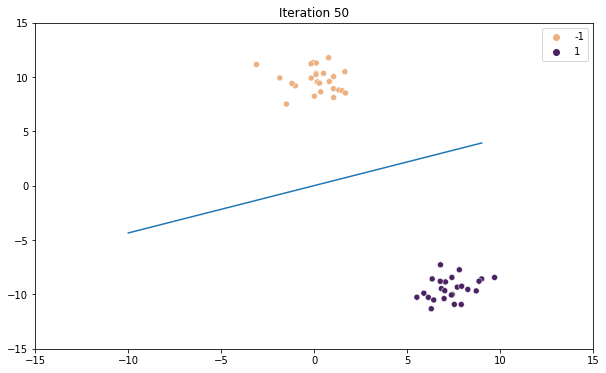

<Figure size 432x288 with 0 Axes>

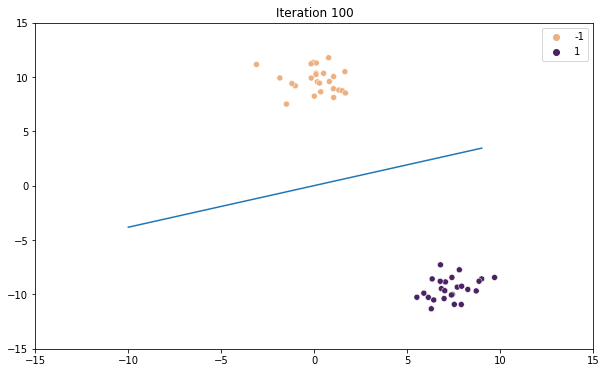

<Figure size 432x288 with 0 Axes>

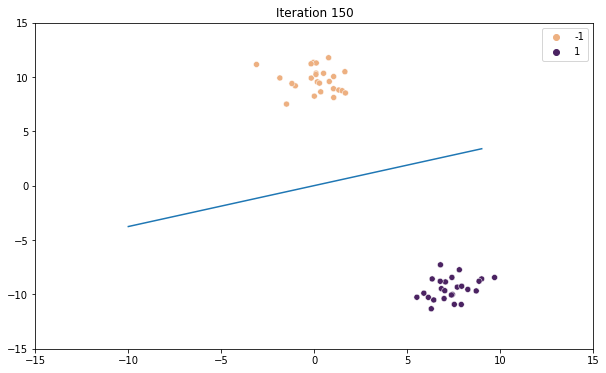

Converged iteration: 178


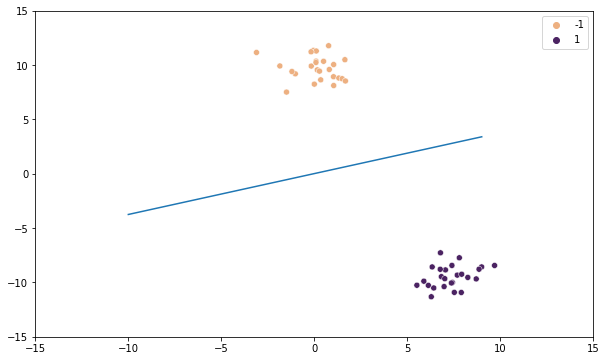

In [18]:
final1,final2,final3,losses,iterations = grad_desc(w1, w2, w0, data_set, labels)

#### Results

In [25]:
print(f'Equation of line is: \t {w1:.3f}x + ({w2:.3f})y + ({w0:.3f}) = 0')

Equation of line is: 	 7.950x + (-7.697)y + (0.128) = 0


##### Loss Minimization

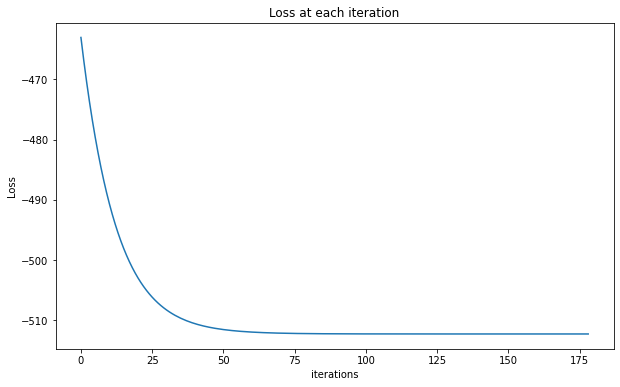

In [26]:
plt.figure(figsize = (10,6))
sbn.lineplot(x = np.arange(iterations+1), y = losses)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Loss at each iteration')
plt.show()

Thank you